# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [4]:
#建立等差數列
np.linspace(20, 70, 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [5]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

# Continous to Discrete
"""
Your Code Here
"""
bin_cut = np.linspace(20, 70, 11) #自 20 到 70 歲，切 11 個點 (得到 10 組)
#pd.cut是利用數值區間將連續性數值分類，進行離散化；pd.qcut則是用百分位數
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], 
                                  bins = bin_cut) 

print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


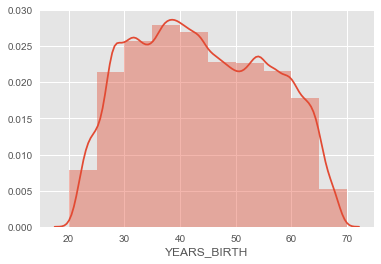

In [6]:
#有一數據，想“看看”它長什麼樣，一般會畫直方圖（Histogram），也可以用核密度估計（kernel density estimation, KDE）來估算這個分配。
#在 seaborn 的 sns 中，使用 distplot() 函式可快速觀察單變數分佈。
#預設會使用柱狀圖(histogram)來繪製，並提供一個適配的核密度估計(KDE)。
sns.distplot(age_data['YEARS_BIRTH'], bins = bin_cut);

In [7]:
age_data.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()

[(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0], (60.0, 65.0], (65.0, 70.0]]
Categories (10, interval[float64]): [(20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] ... (50.0, 55.0] < (55.0, 60.0] < (60.0, 65.0] < (65.0, 70.0]]

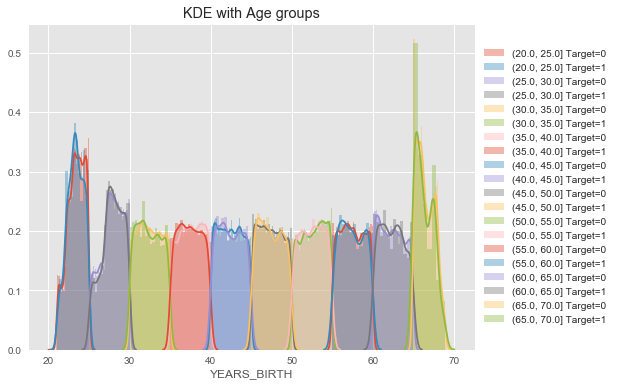

In [8]:
"""
Your Code Here
"""
year_group_sorted = age_data.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + " Target=0")
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + " Target=1")
plt.title('KDE with Age groups')
#bbox_to_anchor(num1, num2)，第一個數值用於控制legend的左右移動，值越大越向右邊移動，
#第二個數值用於控制legend的上下移動，值越大，越向上移動。
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


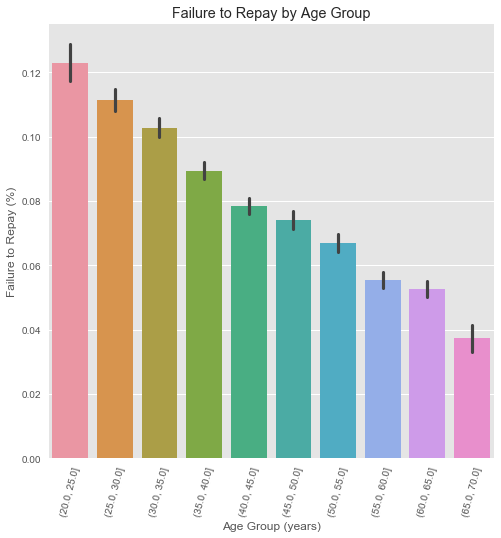

In [10]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot -->柱狀圖seaborn.barplot(x,y,data)
"""
Your Code Here
"""
px = "YEARS_BINNED"
py = "TARGET"
sns.barplot(px, py, data=age_data)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');